In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df=pd.read_csv('water_potability.csv')
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
train_df.shape 

(3276, 10)

In [4]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:

train_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


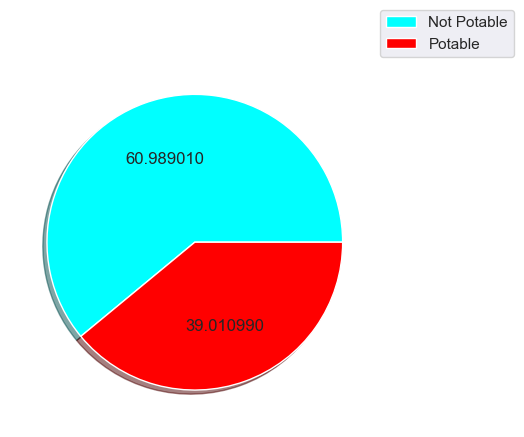

In [6]:
plt.pie(train_df['Potability'].value_counts(),shadow=True, autopct="%f", colors=['aqua', 'red'], radius=1)
plt.legend(['Not Potable','Potable'],loc=(1,1));

<Figure size 1000x600 with 0 Axes>

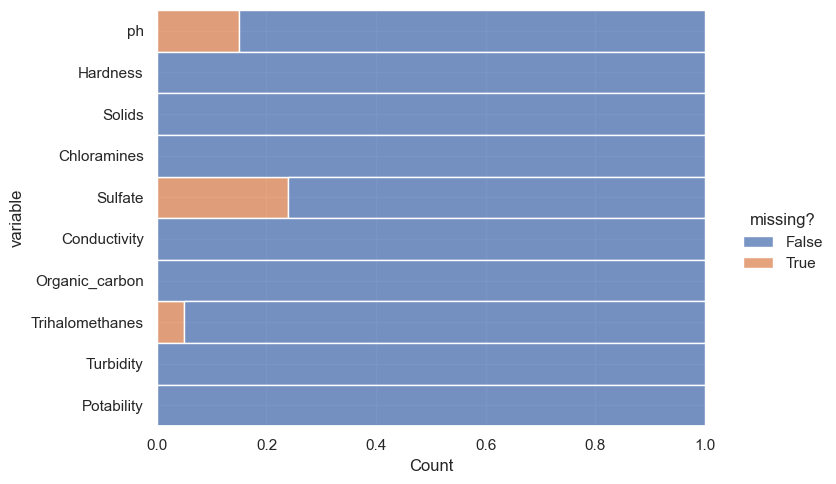

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
data=train_df.isna().melt(value_name="missing?"),
y="variable",
hue="missing?",
multiple="fill",
aspect=1.5
)

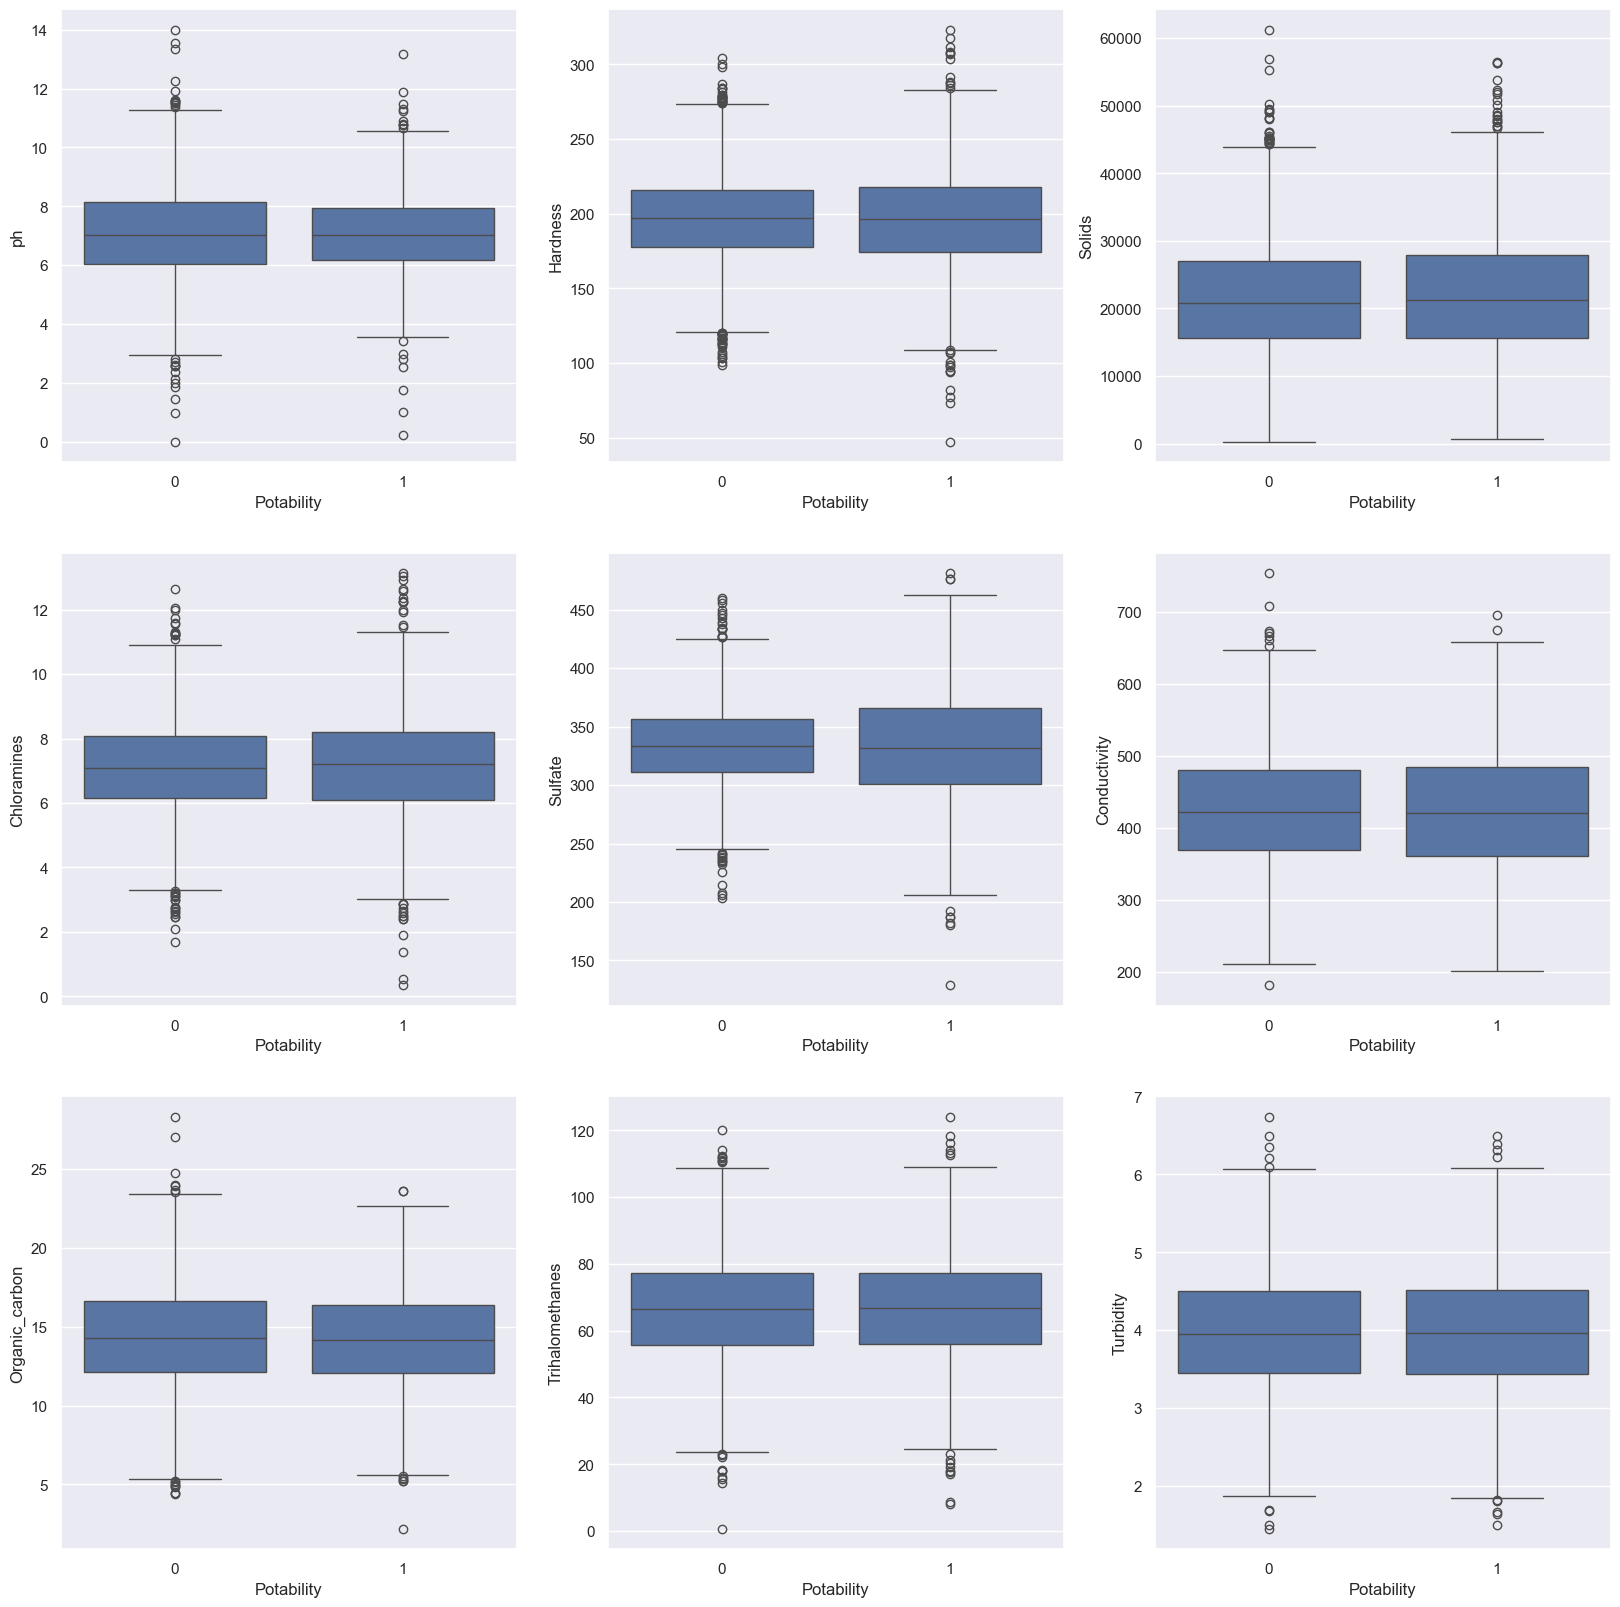

In [8]:

attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.boxplot(x=train_df.Potability, y=train_df[attributes[k]], ax=axes[i,j])
        k=k+1

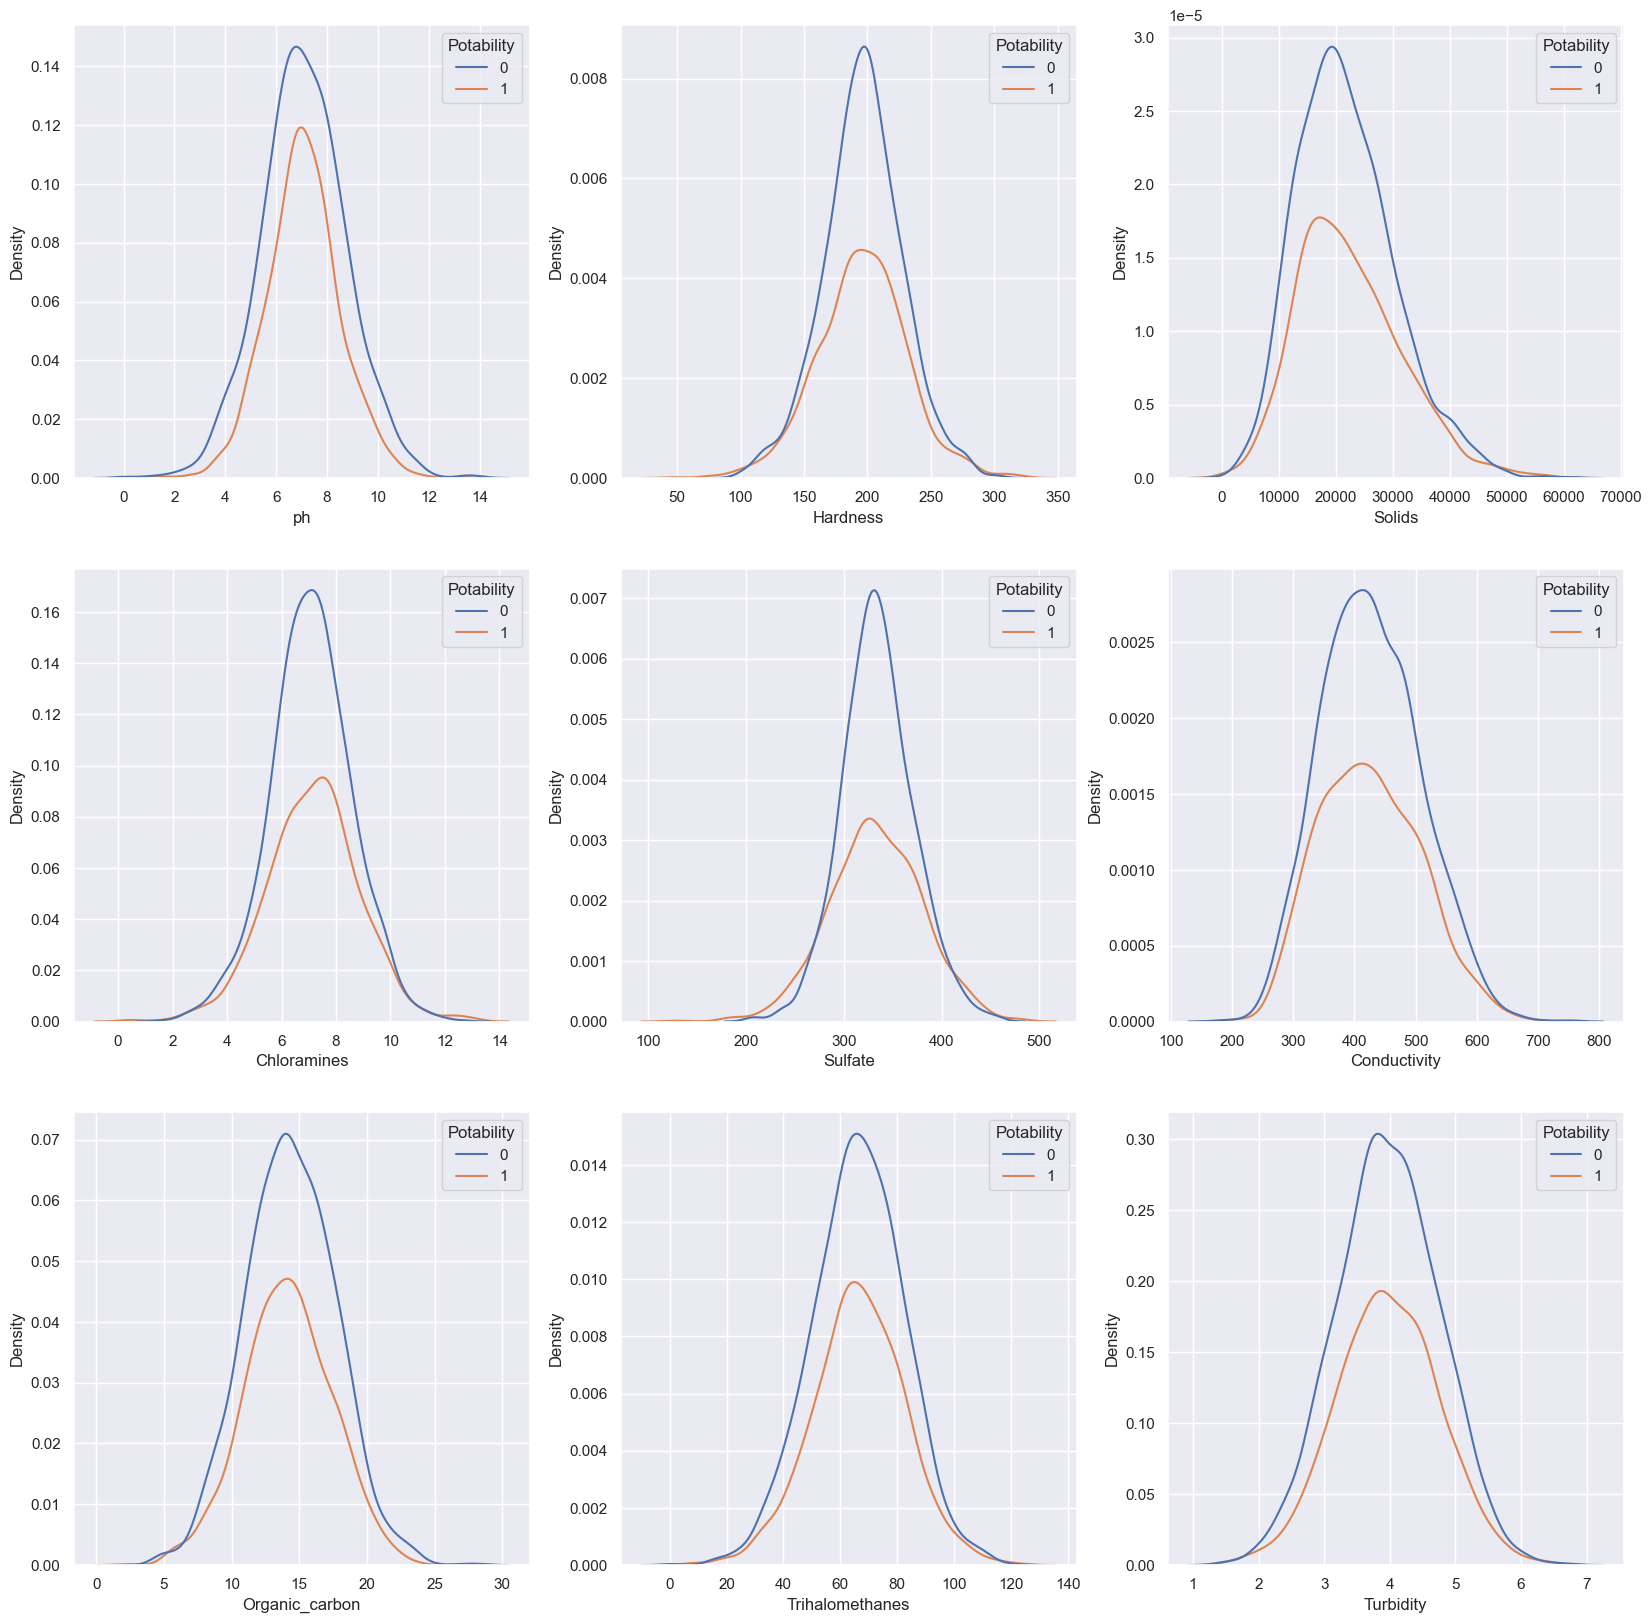

In [9]:

attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.kdeplot(hue=train_df.Potability, x=train_df[attributes[k]], ax=axes[i,j])
        k=k+1

In [10]:
train_df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [11]:

corr_matrix = train_df.corr()
threshold = 0.9
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
print(upper)
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(to_drop)
print(f"Features to drop due to high correlation: {to_drop}")
water_data_reduced = train_df.drop(columns=to_drop)


                 ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
ph              NaN  0.082096 -0.089288    -0.034350  0.018203      0.018614   
Hardness        NaN       NaN -0.046899    -0.030054 -0.106923     -0.023915   
Solids          NaN       NaN       NaN    -0.070148 -0.171804      0.013831   
Chloramines     NaN       NaN       NaN          NaN  0.027244     -0.020486   
Sulfate         NaN       NaN       NaN          NaN       NaN     -0.016121   
Conductivity    NaN       NaN       NaN          NaN       NaN           NaN   
Organic_carbon  NaN       NaN       NaN          NaN       NaN           NaN   
Trihalomethanes NaN       NaN       NaN          NaN       NaN           NaN   
Turbidity       NaN       NaN       NaN          NaN       NaN           NaN   
Potability      NaN       NaN       NaN          NaN       NaN           NaN   

                 Organic_carbon  Trihalomethanes  Turbidity  Potability  
ph                     0.043503         0.003

In [12]:
cov_matrix = water_data_reduced.cov()
variance_threshold = 0.01 
variances = np.diag(cov_matrix)
low_variance_features = [water_data_reduced.columns[i] for i in range(len(variances)) if variances[i] < variance_threshold]
print(f"Features to drop due to low variance: {low_variance_features}")
water_data_final = water_data_reduced.drop(columns=low_variance_features)

Features to drop due to low variance: []


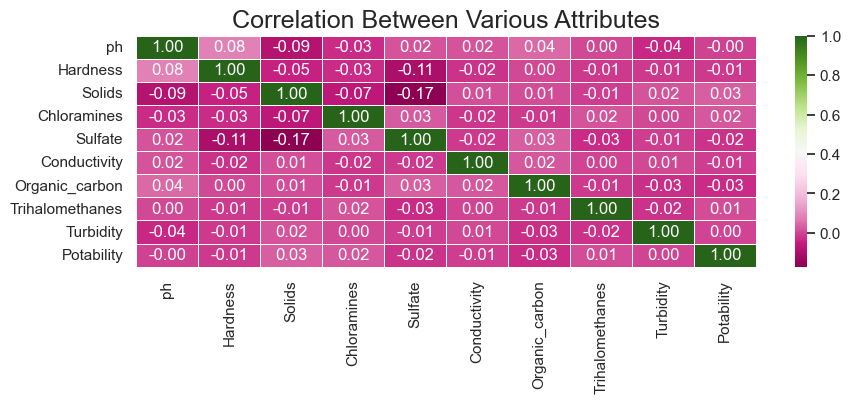

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.heatmap(train_df.corr(), annot=True, cmap='PiYG', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Between Various Attributes', fontsize=18)
plt.show()

#Missing values from the train data
train_df.isna().sum()

In [14]:
cond=train_df['Potability']==0

train_df['ph'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['ph'].median(),
                                False:train_df.loc[train_df['Potability']==1]['ph'].median()
                                }),inplace=True)

train_df['Sulfate'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Sulfate'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Sulfate'].median()
                                }),inplace=True)

train_df['Trihalomethanes'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Trihalomethanes'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Trihalomethanes'].median()
                                }),inplace=True)

In [15]:
train_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Figure size 1000x600 with 0 Axes>

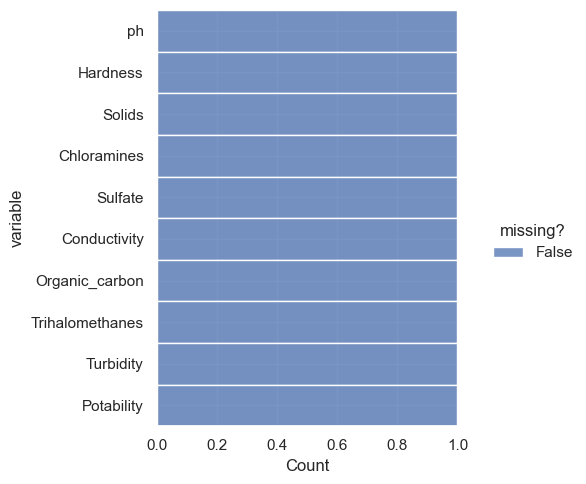

In [16]:
plt.figure(figsize=(10,6))
sns.displot(
data=train_df.isna().melt(value_name="missing?"),
y="variable",
hue="missing?",
multiple="fill",
aspect=1
)

In [17]:
train_df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,47.432,320.942611,0.352,129.000000,181.483754,2.2,0.738,1.450,0.0
max,14.0,323.124,61227.196008,13.127,481.030642,753.342620,28.3,124.000,6.739,1.0


In [18]:
input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [19]:
scaler = MinMaxScaler()
scaler.fit(train_df[input_cols])
train_df[input_cols] = scaler.transform(train_df[input_cols])
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502533,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0
1,0.265434,0.297400,0.300611,0.491839,0.580601,0.719411,0.497319,0.450999,0.576793,0
2,0.578509,0.641311,0.321619,0.698543,0.580601,0.414652,0.562017,0.532866,0.303637,0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0


In [20]:
#Min-Max range after scaling
train_df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
#Seperating Response Variable from the dataset
X=train_df.drop('Potability',axis=1)
y=train_df['Potability']

In [22]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
clf=DecisionTreeClassifier(random_state=41,max_depth=6,min_samples_split=0.03)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
pred=clf.predict(X_train)

print("Accuracy of validation data :",accuracy_score(y_test.values,Y_pred))

Accuracy of validation data : 0.7814407814407814


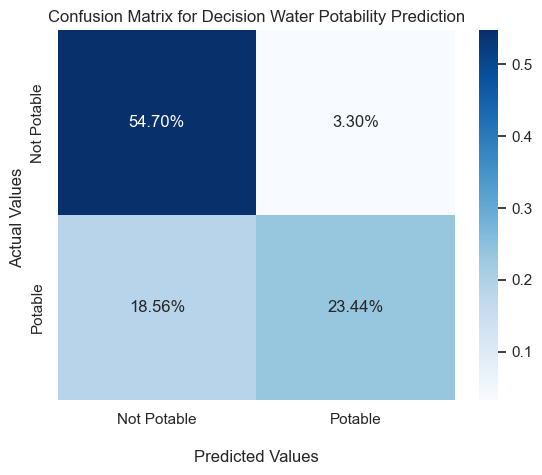

In [25]:
cf_matrix=confusion_matrix(y_test,Y_pred)
labels=['True Negative','False Positive','False Negative','True Positive']
labels=np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])

plt.title('Confusion Matrix for Decision Water Potability Prediction')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

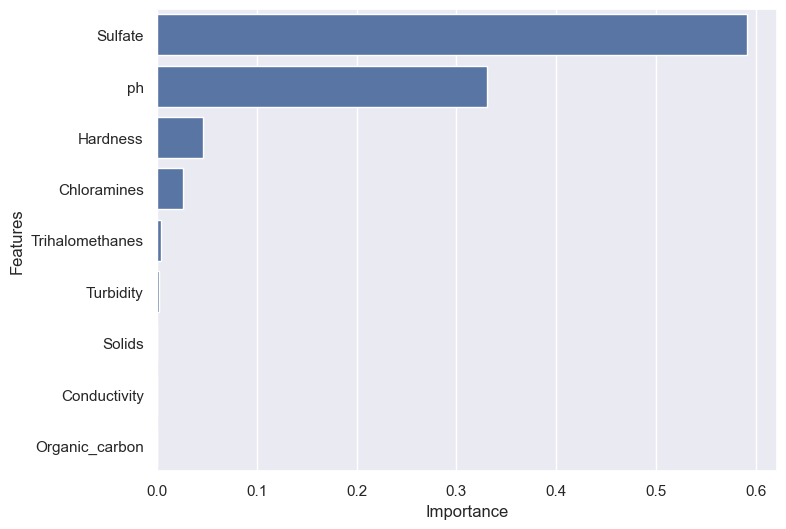

In [26]:
feature_importance = pd.DataFrame({'Features':X.columns,
                                   'Importance':clf.feature_importances_
                                  }).sort_values('Importance', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Features']);


In [27]:
from sklearn import tree
plt.figure(figsize=(20,20),dpi=500)
tree.plot_tree(clf,feature_names=attributes, class_names=None,filled=True,rounded=True)
plt.show();

In [28]:
from sklearn.metrics import precision_score, recall_score
min_len = min(len(y_test), len(Y_pred))
y_true_trimmed = y_test[:min_len]
y_pred_trimmed = Y_pred[:min_len]
precision = precision_score(y_true_trimmed, y_pred_trimmed)
recall = recall_score(y_true_trimmed, y_pred_trimmed)
print(f'Precision of Decision Tree: {precision}')
print(f'Recall of Decision Tree: {recall}')

Precision of Decision Tree: 0.8767123287671232
Recall of Decision Tree: 0.5581395348837209


In [29]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, Y_pred)
print(f"F1 Score of Decision Tree: {f1}")

F1 Score of Decision Tree: 0.6820603907637656


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
X = train_df.iloc[:, :-1]  
y = train_df.iloc[:, -1]   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy of XGBoost: {accuracy}')
print(f'Precision of XGBoost: {precision}')
print(f'Recall of XGBoost: {recall}')
print(f'F1 Score of XGBoost: {f1}')


Accuracy of XGBoost: 0.7835365853658537
Precision of XGBoost: 0.780592789904272
Recall of XGBoost: 0.7835365853658537
F1 Score of XGBoost: 0.7807562404119074


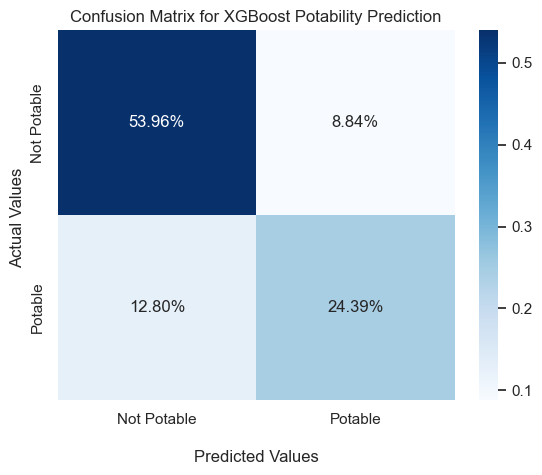

In [31]:
cf_matrix=confusion_matrix(y_test,y_pred)
labels=['True Negative','False Positive','False Negative','True Positive']
labels=np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])

plt.title('Confusion Matrix for XGBoost Potability Prediction')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



plt.show()

Accuracy of the Random Forest model: 0.81
Precision of RF: 0.809071708767877
Recall of RF: 0.8079268292682927
F1 Score of RF: 0.8012883882991653


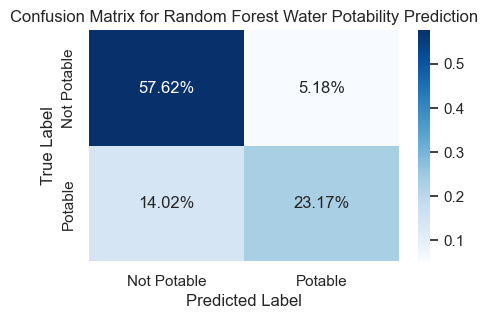

In [32]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Precision of RF: {precision}')
print(f'Recall of RF: {recall}')
print(f'F1 Score of RF: {f1}')
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.title('Confusion Matrix for Random Forest Water Potability Prediction')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
